In [1]:
import matplotlib.pyplot as plt 
from glob import glob
import cv2
import random 
import os

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensor Flow Version:",tf.__version__)

Tensor Flow Version: 2.18.0


In [3]:
#exploring dataset

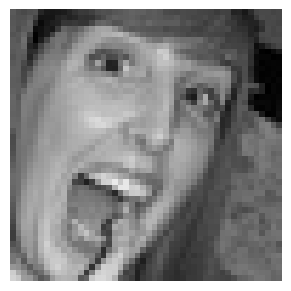

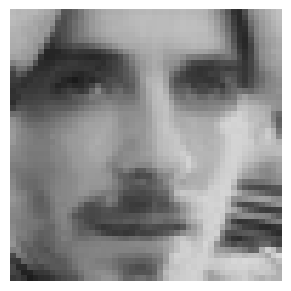

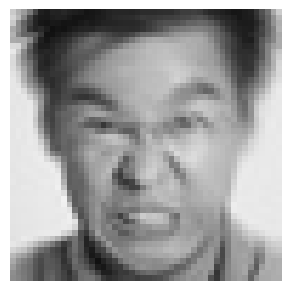

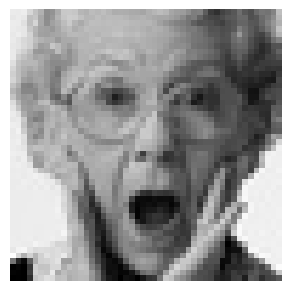

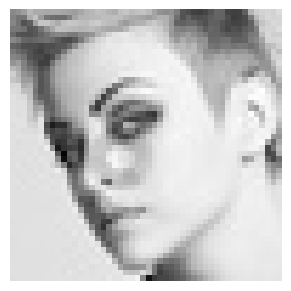

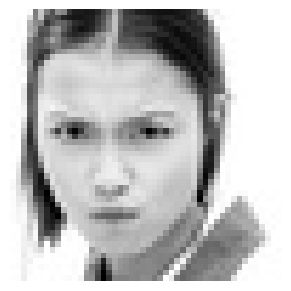

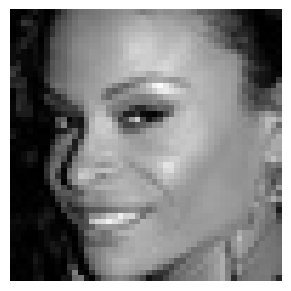

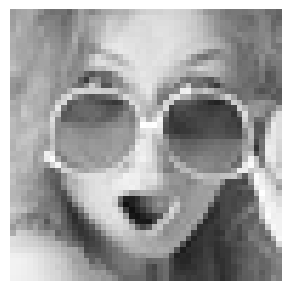

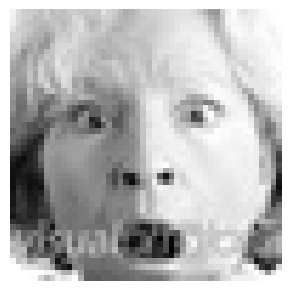

In [4]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')
    

** Preparing data for training **

In [5]:
img_size= 48
batch_size= 64
datagen_train= ImageDataGenerator()
train_generator= datagen_train.flow_from_directory("train/",
                                                   target_size= (img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size= batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)
datagen_validation= ImageDataGenerator()
validation_generator= datagen_train.flow_from_directory("test/",
                                                   target_size= (img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size= batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


** Defining Model **

In [6]:
def convolution(input_tensor, filters, kernel_size):
    x= Conv2D(filters= filters, kernel_size= kernel_size, padding="same")(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= MaxPooling2D(pool_size= (2,2))(x)
    x= Dropout(0.25)(x)
    return x

In [7]:
def Dense_f(input_tensor, nodes):
    x= Dense(nodes)(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= Dropout(0.25)(x)
    return x

In [8]:
def model_fer(input_shape):
    inputs= Input(input_shape)
    conv_1= convolution(inputs,32,(3,3))
    conv_2= convolution(inputs,64,(5,5))
    conv_3= convolution(inputs,128,(3,3))
    flatten = Flatten()(conv_3)
    dense_1= Dense_f(flatten,256)
    output= Dense(7,activation="softmax")(dense_1)
    model= Model(inputs=[inputs], outputs=[output])
    model.compile(loss= ['categorical_crossentropy'], optimizer = 'adam', metrics= ['accuracy'])
    return model


In [9]:
model= model_fer((48,48,1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

In [10]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5",monitor = "val_accuracy", save_weights_only = True, mode='max', verbose =1)
callbacks = [checkpoint]

In [11]:
#training model

In [ ]:
history = model.fit(
    x= train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks )

Epoch 1/15


C:\Users\SG\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\SG\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 1))
  warnings.warn(msg)


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.3286 - loss: 1.8302
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 289s 638ms/step - accuracy: 0.3287 - loss: 1.8298 - val_accuracy: 0.3256 - val_loss: 1.7086
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:05 550ms/step - accuracy: 0.4531 - loss: 1.3593

C:\Users\SG\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.4531 - loss: 1.3593 - val_accuracy: 0.3450 - val_loss: 1.6679
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.4968 - loss: 1.3370
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 397s 886ms/step - accuracy: 0.4967 - loss: 1.3370 - val_accuracy: 0.4139 - val_loss: 1.5132
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:00 940ms/step - accuracy: 0.3594 - loss: 1.4623
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.3594 - loss: 1.4623 - val_accuracy: 0.4273 - val_loss: 1.4893
Epoch 5/15
152/448 ━━━━━━━━━━━━━━━━━━━━ 3:43 754ms/step - accuracy: 0.5717 - loss: 1.1539

In [ ]:
#model evaluation

In [ ]:
model.evaluate(validation_generator)

In [ ]:
#plotting loss

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
#savingmodel

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)